In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
plt.style.use('fivethirtyeight')

In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(url, header = None, sep = ",")
wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

wine2 = wine.drop(columns = "class")

# Mise en place de la CAH

In [14]:
hac = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
hac.fit(scale(wine2))

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [15]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

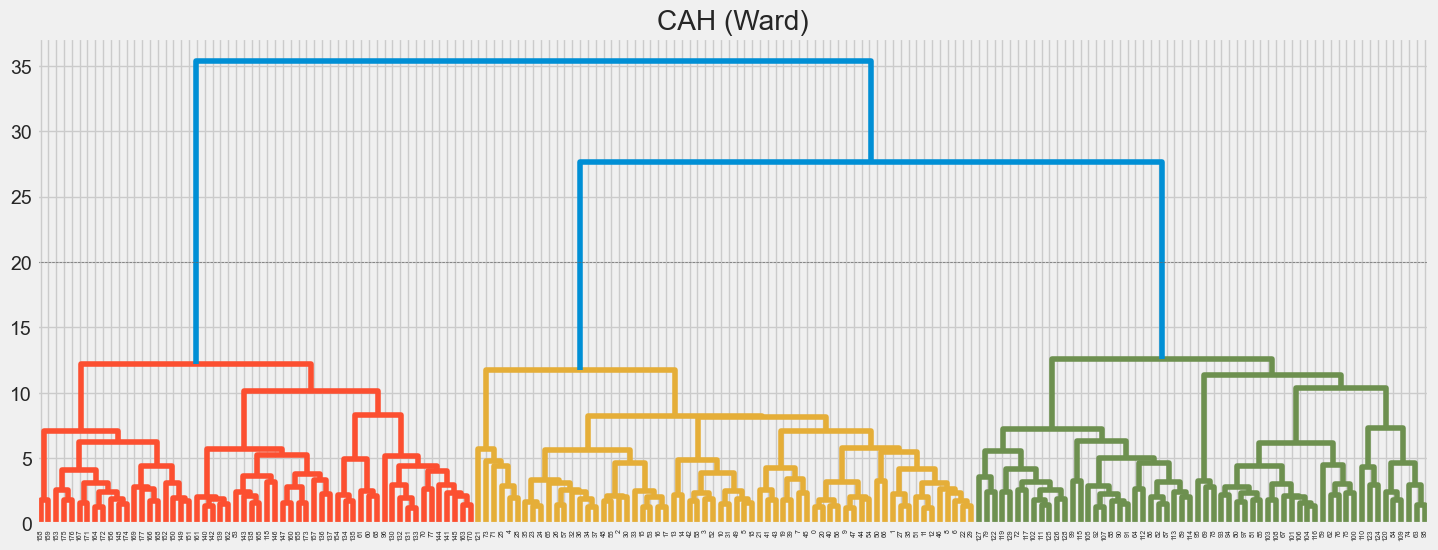

In [16]:
plt.figure(figsize = (16, 6))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 20, linewidth = .5, color = "dimgray", linestyle = "--") # Choisir là ou on va coupé
plt.show()

Nous pouvons assez aisément sugéré 3 classes.
Reprendre la CAH a le nombre de classe voulue

In [17]:
hac3 = AgglomerativeClustering(n_clusters = 3)
hac3.fit(scale(wine2))

AgglomerativeClustering(n_clusters=3)

# Production des statistiques pour chaque classe décidé par la CAH

In [18]:
data = wine2.assign(classe = hac3.labels_).groupby("classe").mean().round(2)
wine2.assign(classe = hac3.labels_).groupby("classe").mean().round(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
classe,,,,,,,,,,,,,
0,12.20,1.94,2.22,20.21,92.55,2.26,2.09,0.36,1.69,2.90,1.06,2.86,501.43
1,13.06,3.17,2.41,21.00,99.86,1.69,0.85,0.45,1.13,6.85,0.72,1.73,624.95
2,13.67,1.97,2.46,17.53,106.16,2.85,3.01,0.29,1.91,5.45,1.07,3.16,1076.05


## Statistique par classe

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

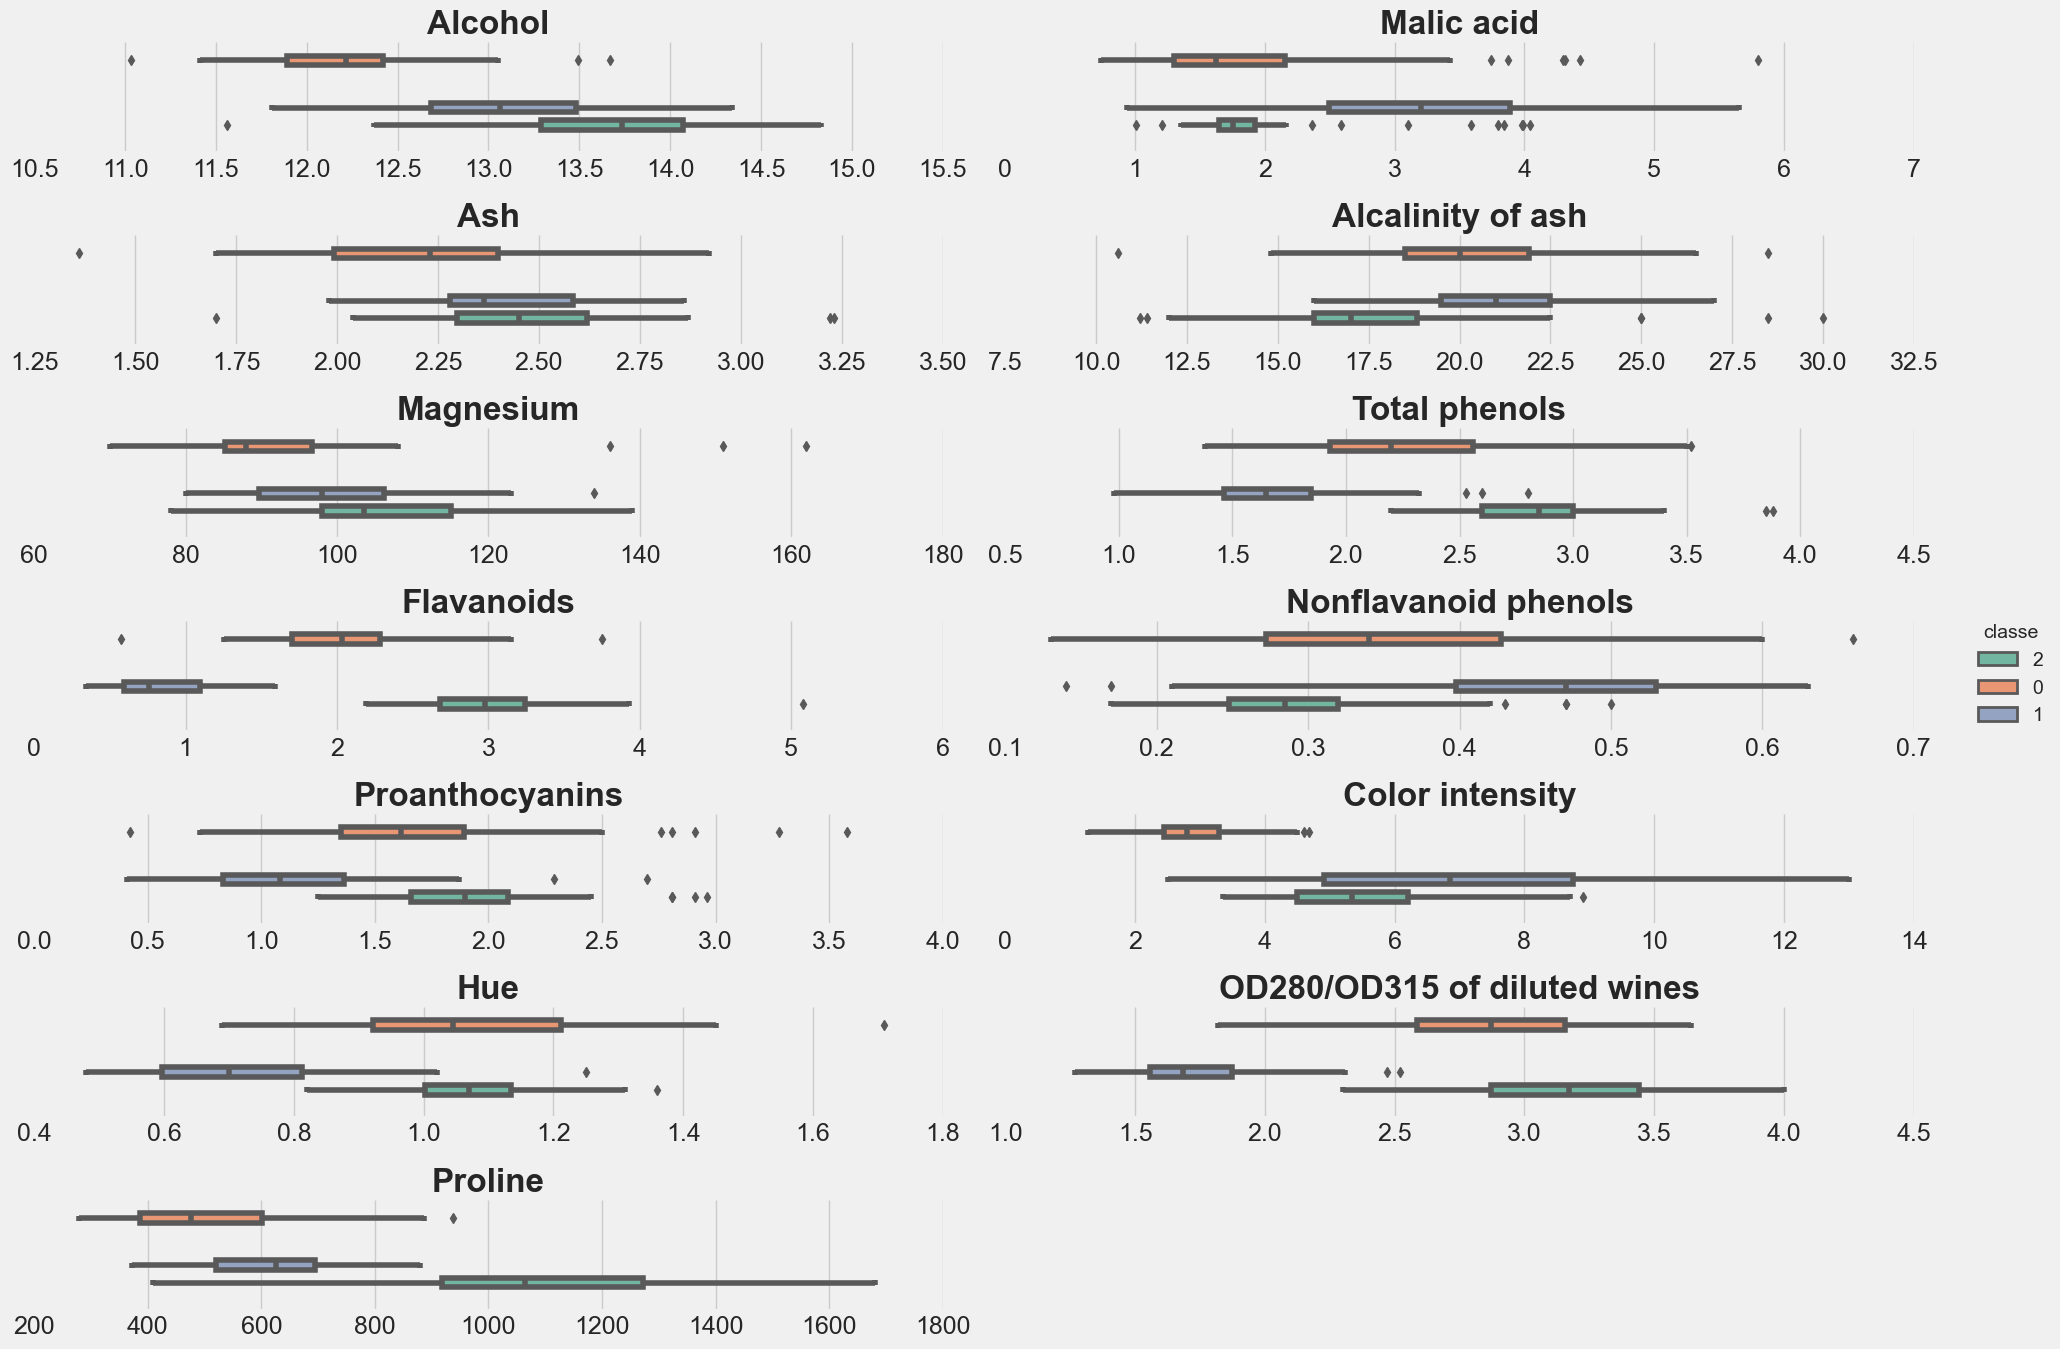

In [19]:
g = sns.catplot(
    data = wine2.assign(classe = [str(v) for v in hac3.labels_]) \
                .melt(id_vars = "classe"),
    x = "value", y = "classe", hue = "classe",
    kind = "box",
    col = "variable", col_wrap = 2, sharex = False, order = ["0", "1", "2"],
    height = 2, aspect = 5, palette = "Set2"
)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.set_yticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "", y_var = "")
plt.show()

Représentation des densité

In [21]:
classe = hac3.labels_
wine2["class"] = classe
wine2.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.ty

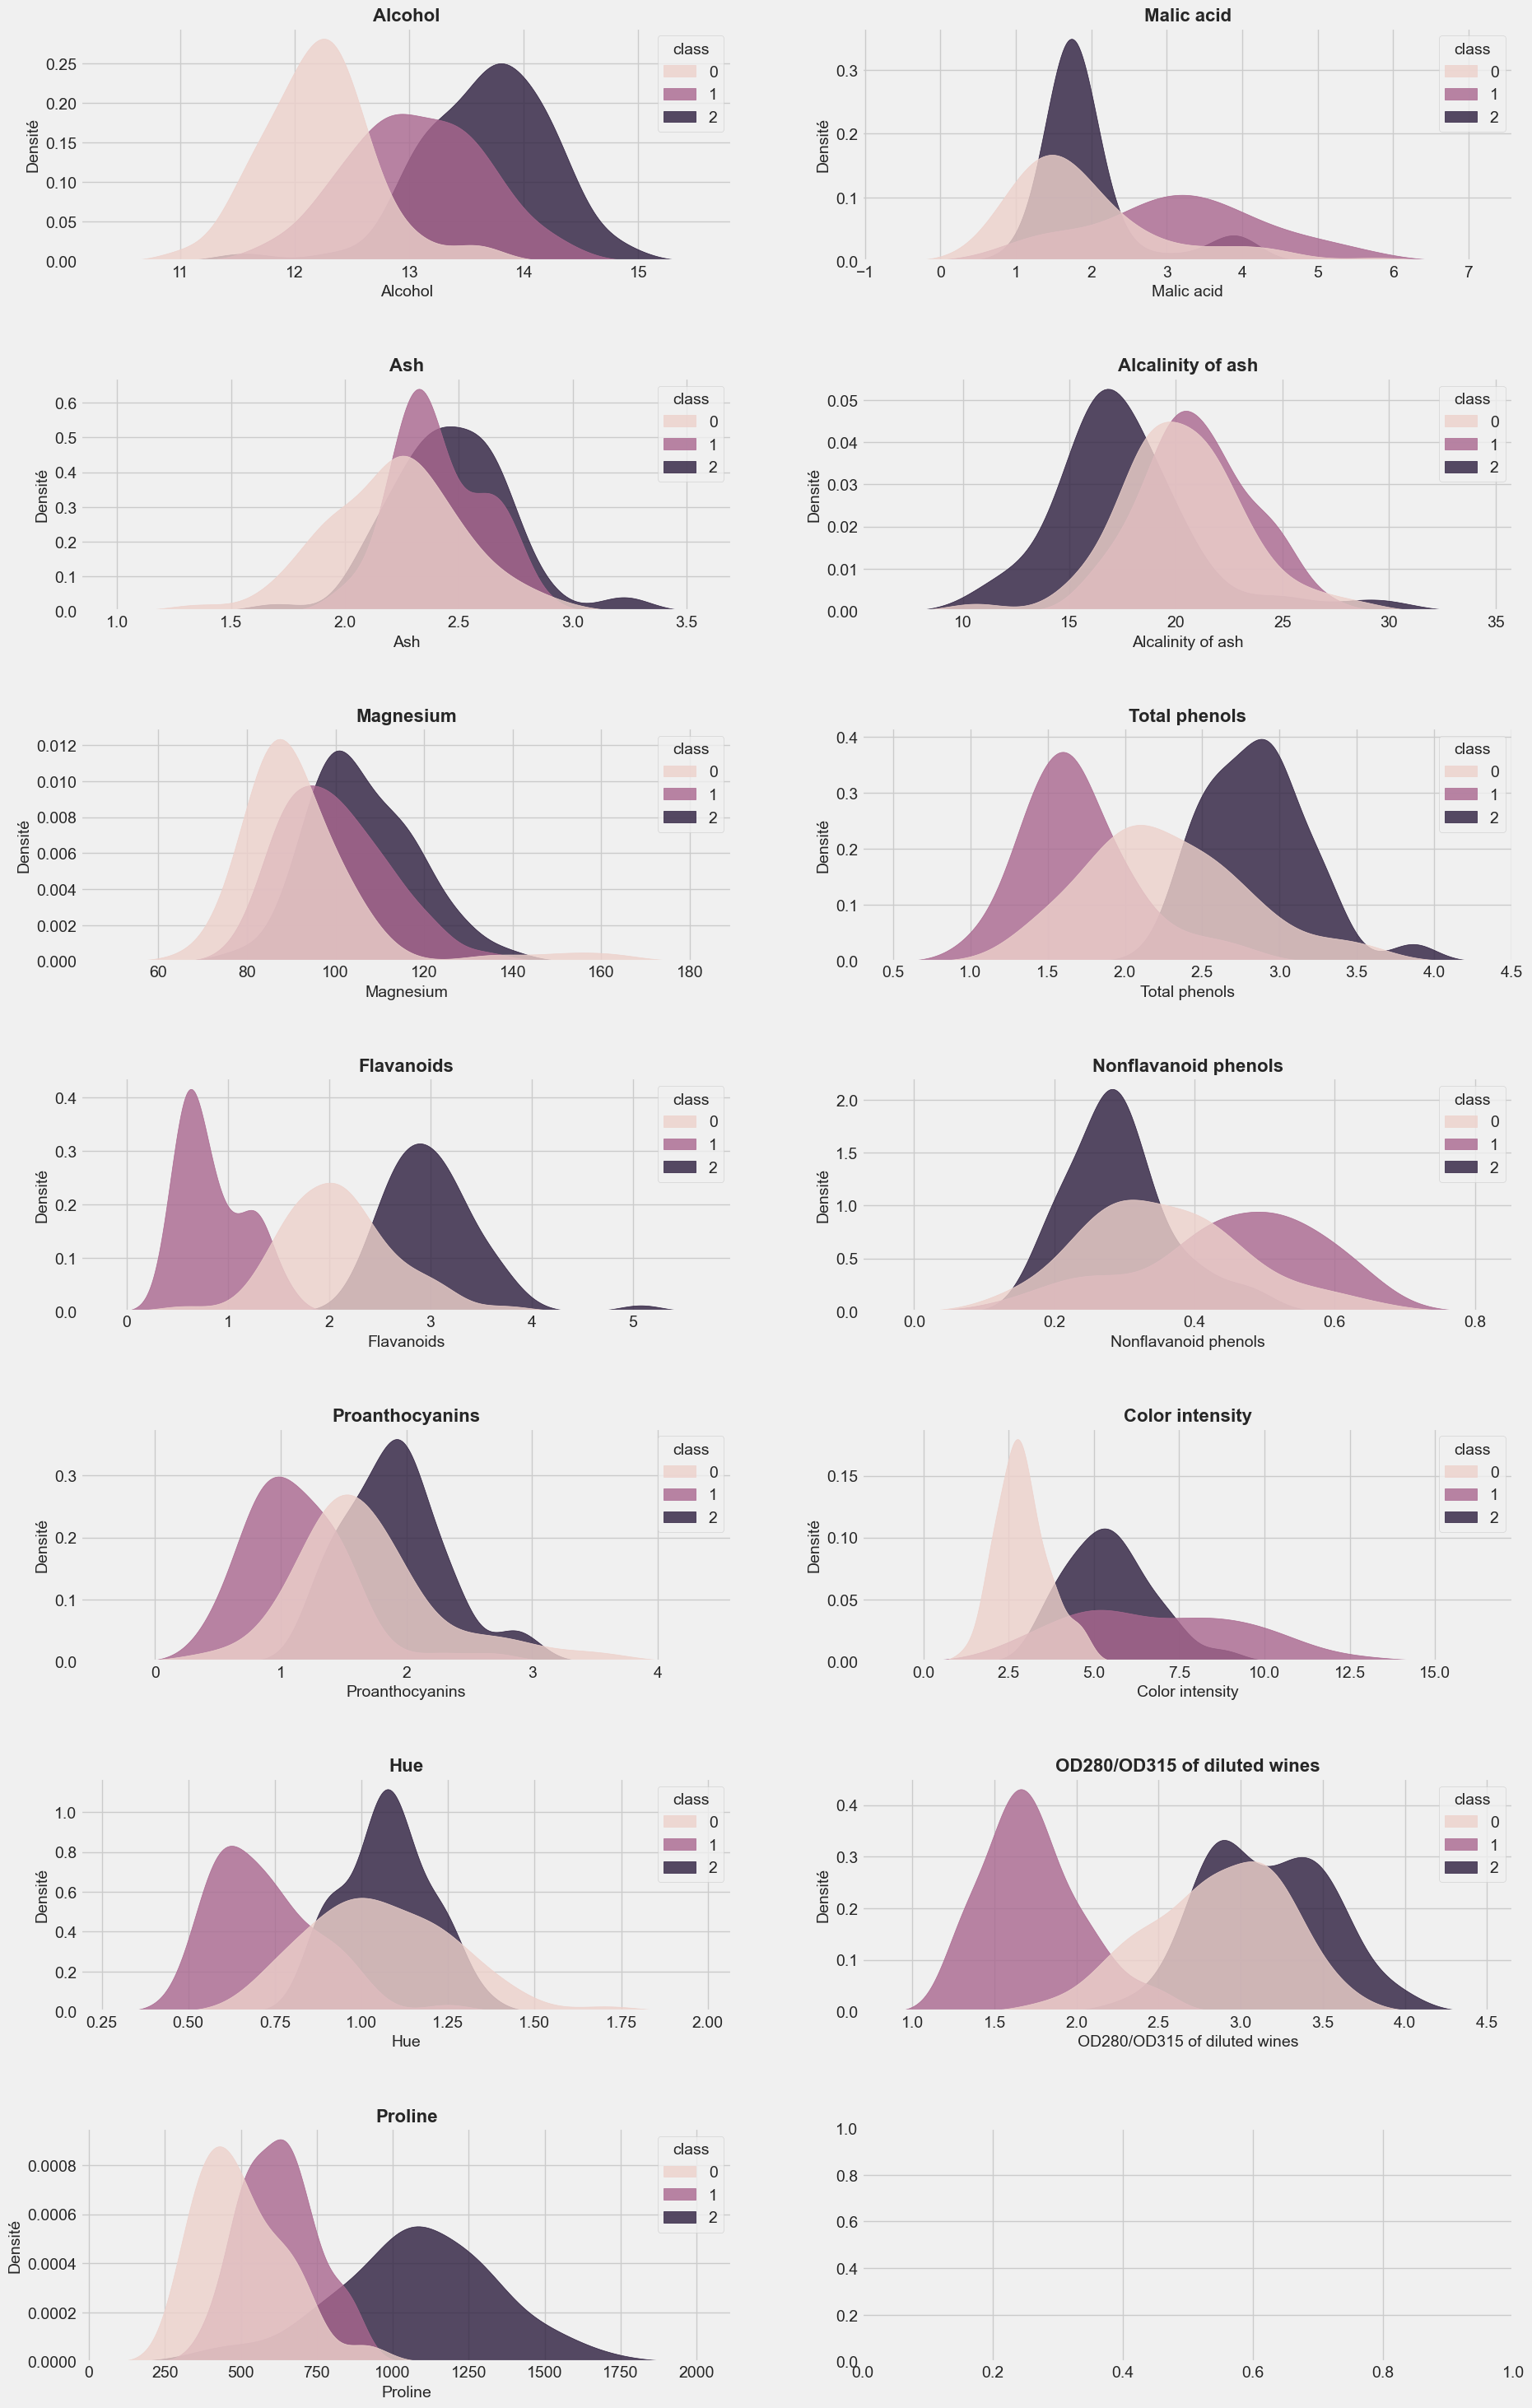

In [22]:
fig, axes = plt.subplots(7,2, figsize = (20,35)) # 7 et 2 : la multiplication donne 14 (a peu pres le nombre de variable)
plt.subplots_adjust(hspace=0.5)
columns = wine2.columns[:-1]
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = wine2,
                x = column,
                fill = True,
                alpha = 0.8,
                hue = 'class',
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Densité', fontsize = 14)
plt.show()

# Tableau croisé entre entre vrai valeur et classe prédicte

In [26]:
pd.crosstab(hac3.labels_, wine["class"]) # je peux faire +1 sur hac3.lables pour avoir les mêmes chose

class,1,2,3
row_0,,,
0,0,58,0
1,0,8,48
2,59,5,0


c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

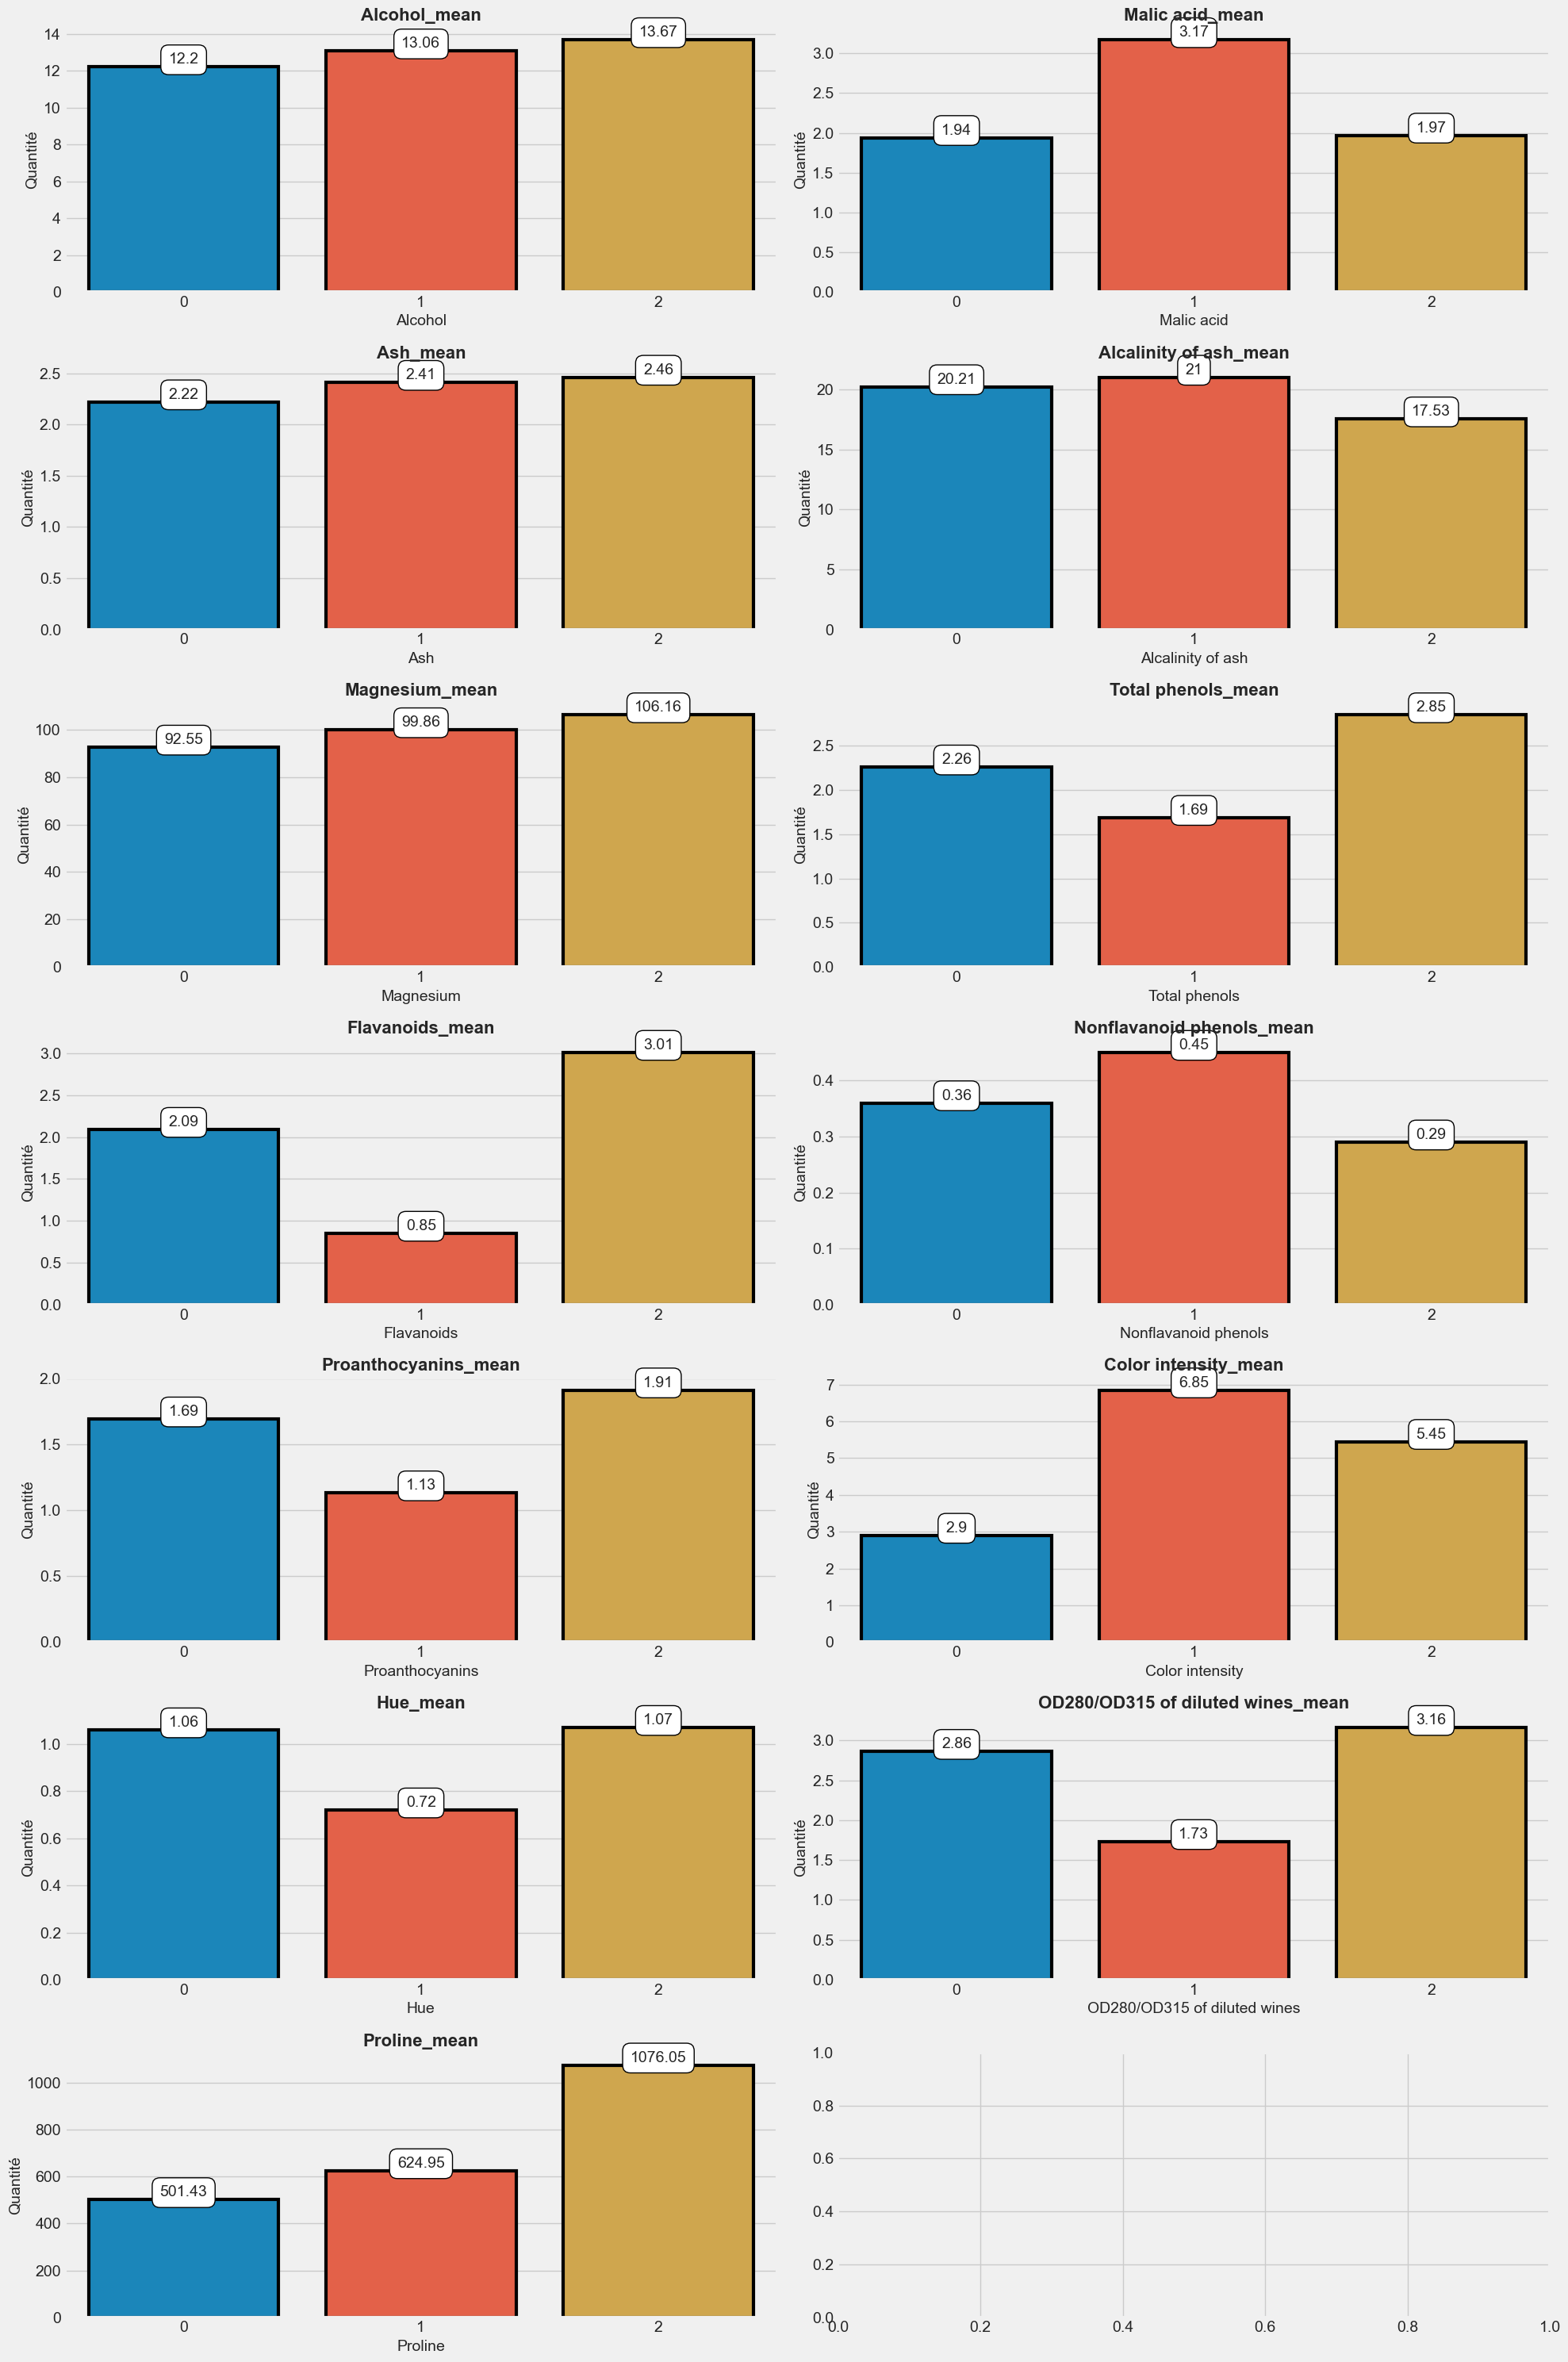

In [23]:
bbox = {'boxstyle': 'round',
        'pad': 0.5,
        'facecolor': 'white',
        'edgecolor': 'black',
        'linewidth': 1,
        'alpha': 1}

fig, axes = plt.subplots(7, 2, figsize=(20, 30))  # Ajustez la hauteur de la figure

columns = data.columns
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    p1 = sns.barplot(data=data, x=data.index, y=column, linewidth=3, edgecolor='black', ax=ax)
    p1.bar_label(p1.containers[0], bbox=bbox)
    
    ax.set_title(f'{column}_mean', fontweight='bold', fontsize=16)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Quantité', fontsize=14)

# Réglez l'espacement entre les sous-graphiques pour que les titres s'affichent correctement
plt.tight_layout()

plt.show()
